In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.6, random_state=0)

주어진 데이터의 분포도를 미리 파악하여 centers 임의로 정함 <br>
-> 중심점이 너무 다를 경우, 너무 많은 iteration(반복)으로 인하여 runtime이 끝날 수 있다. <br>
-> 또한, 잘못된 중심점을 설정할 경우, 해당 위치에서 빠져나오지 못할 수 가 있음.

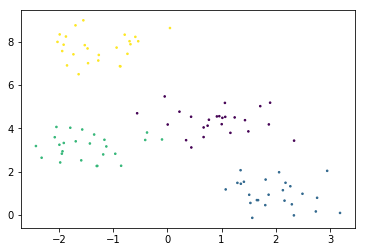

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_data(X,y):
    plt.scatter(X[:,0],X[:,1], c=y, marker='.',s=10)
plot_data(X,y)
plt.show()

**[기존 코드]** <br>
clusterAssigned는 minIndex와 minDist을 2열로 받으므로 초기화 시킬때 k가 아닌 2로 받아와야한다.

In [4]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print("\n\n====== Iteration {} ======".format(iter))
        for i in range(row):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist]
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        comparison = np.equal(centroids, _centroids)
        if(comparison.all()==True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            print("\n Centroids {}회만에 찾기 완료".format(iter))
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1

In [5]:
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [6]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')



====== Iteration 1 ======

.....Updating Centroids
 [[ 2.  5.]
 [ 2.  2.]
 [-1.  2.]
 [ 0.  8.]] => 
[[ 0.8983329   4.46479759]
 [ 1.99299447  1.07350657]
 [-1.33168321  3.16639791]
 [-1.27208964  7.74944718]]


====== Iteration 2 ======

.....NOT Updating Centroids
 [[ 0.91568734  4.32895204]
 [ 1.97918933  0.97920012]
 [-1.46984735  3.1570263 ]
 [-1.27208964  7.74944718]] => 
[[ 0.91568734  4.32895204]
 [ 1.97918933  0.97920012]
 [-1.46984735  3.1570263 ]
 [-1.27208964  7.74944718]]

 Centroids 2회만에 찾기 완료


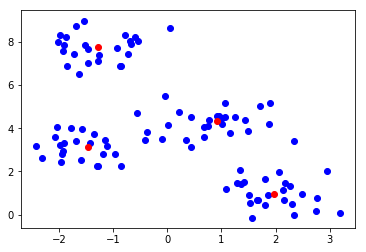

In [7]:
k = 4
centroids = np.array([[2,5],[2,2],[-1,2],[0,8]], dtype = float)
#centroids = np.array([[1,1],[4,1]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

In [8]:
centroids #중심점들의 값

array([[ 0.91568734,  4.32895204],
       [ 1.97918933,  0.97920012],
       [-1.46984735,  3.1570263 ],
       [-1.27208964,  7.74944718]])

In [9]:
x1=clusterAssigned[:,0].astype(int) #함수 cluster에 의해 나온 값들
x1

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

In [10]:
y #make_blobs 함수를 통해 배정된 cluster의 값들

array([0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 3,
       2, 1, 0, 2, 2, 0, 1, 1, 1, 3, 1, 1, 2, 0, 3, 1, 3, 2, 0, 2, 3, 2,
       2, 3, 1, 2, 0, 0, 0, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 0, 1, 3,
       2, 2, 1, 0, 3, 1, 0, 3, 0, 0, 2, 2, 1, 1, 1, 3, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 2, 3, 3, 2, 3, 0])

np.equal을 통하여 두개의 값들의 동일함이 모두 True 가 나온 것을 알 수 있음

In [11]:
np.equal(x1, y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])